#**Task 3**


In [ ]:
import torch as torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

##1. Loading your MNIST dataset for the data loader

In [ ]:
transform = transforms.Compose ([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 30256993.55it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 43078127.25it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43295217.15it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14790783.20it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## 2. Visualize several MNIST datasets

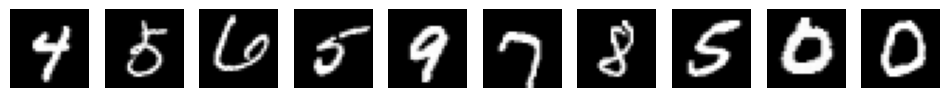

In [ ]:
%matplotlib inline
def plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
  for i, image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

images, labels = next(iter(train_loader))
plot_images(images[:10])

## 3. Design your Neural Network model

In [ ]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.Linear1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.Linear2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.Linear1(x)
        x = self.relu(x)
        x = self.Linear2(x)
        return x
net = NN()

## 4. Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc

In [ ]:
cross_el = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
epoch = 20

## 5. Develop a training loop and run a training model

In [ ]:
for epoch in range(epoch):
  net.train()
  running_loss = 0.0

  for data in train_loader:
    x, y = data
    optimizer.zero_grad()
    outputs = net(x.view(-1, 28*28))
    loss = cross_el(outputs, y)
    loss.backward()
    optimizer.step()

  running_loss += loss.item()
  average_loss = running_loss / len(train_loader)

  print(f'[{epoch + 1}, {epoch + 1:5d}] Loss : {running_loss/2000:.5f}')

[1,     1] Loss : 0.00000
[2,     2] Loss : 0.00000
[3,     3] Loss : 0.00007
[4,     4] Loss : 0.00006
[5,     5] Loss : 0.00000
[6,     6] Loss : 0.00007
[7,     7] Loss : 0.00000
[8,     8] Loss : 0.00000
[9,     9] Loss : 0.00008
[10,    10] Loss : 0.00000
[11,    11] Loss : 0.00001
[12,    12] Loss : 0.00000
[13,    13] Loss : 0.00000
[14,    14] Loss : 0.00000
[15,    15] Loss : 0.00002
[16,    16] Loss : 0.00000
[17,    17] Loss : 0.00001
[18,    18] Loss : 0.00001
[19,    19] Loss : 0.00000
[20,    20] Loss : 0.00015


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    x, y = data
    output = (x.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

## 6. Evaluate the Model using several performance metrics such as accuracy, confusion matrix, F1 Score, Precision, Recall, etc

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


y_labels = []
y_preds = []

with torch.no_grad():
  for images, labels in test_loader:
    outputs = net(images.view(-1, 28 * 28))
    _, preds = torch.max(outputs, 1)
    y_labels.extend(labels.numpy())
    y_preds.extend(preds.numpy())

accuracy = accuracy_score(y_labels, y_preds)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_labels, y_preds, average='weighted')
print(f'Precision: {precision}')

recall = recall_score(y_labels, y_preds, average='weighted')
print(f'Recall: {recall}')

f1 = f1_score(y_labels, y_preds, average='weighted')
print(f'F1 Score: {f1}')

confusion_matrix = confusion_matrix(y_labels, y_preds)
print(f'Confusion Matrix:\n{confusion_matrix}')

Accuracy: 0.9722
Precision: 0.972286910218698
Recall: 0.9722
F1 Score: 0.9722009107247621
Confusion Matrix:
[[ 971    0    2    0    0    2    2    0    3    0]
 [   0 1117    5    1    0    1    1    2    7    1]
 [   4    1 1010    2    0    0    3    3    9    0]
 [   1    0    9  973    0    8    0    4    4   11]
 [   3    0    4    0  952    1    3    4    2   13]
 [   4    0    0    9    2  864    4    1    5    3]
 [   8    2    1    0    7    5  930    1    4    0]
 [   2    1   13    4    0    0    0 1000    3    5]
 [   3    0    5    2    3    5    2    4  947    3]
 [   3    3    0    5   13    5    0   13    9  958]]


## 7. Describe and explain your Result

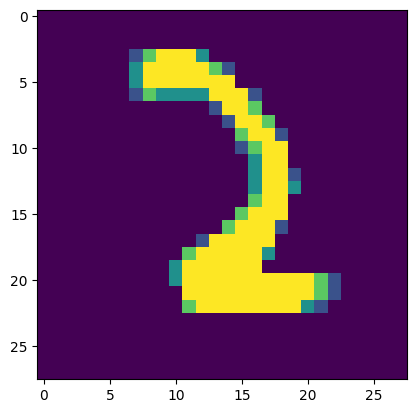

tensor(93)


In [ ]:
plt.imshow(x[3].view(28, 28))
plt.show()
print(torch.argmax((x[3].view(-1, 784))[0]))